## 파이토치의 구성요소

    - torch: 텐서를 생성하는 라이브러리
    - torch.autograd: 자동 미분 기능을 제공하는 라이브러리
    - torch.nn: 신경망을 생성하는 라이브러리
    - torch.mutiprocessing : 병렬처리 기능을 제공하는 라이브러리
    - torch.utils : 데이터 조작 등 유틸리티 기능 제공
    - torch.legacy(./nn/.optim) : Torch로부터 포팅해온 코드
    - torch.onnx : ONNX(Open Neural Network Exchange)
        - 서로 다른 프레임워크 간의 모델을 공유할 때 사용

## 텐서(Tensors)
- 넘파이(Numpy)의 ndarray와 유사
- GPU를 사용한 연산 가속도 가능

In [1]:
import torch
torch.__version__

'1.9.0+cu111'

### 초기화 되지 않은 행렬
- 초기화가 되지 않았지만, 메모리를 잡고, 메모리에 있던 기존에 사용하던 값들을 가져와 Tensor로 만듬 특정 값이 있는거 처럼 보임

In [20]:
#torch.empty(행,열)

x = torch.empty(4,2)
print(x)

tensor([[-1.8088e-31,  4.5642e-41],
        [-2.1558e+18,  3.0763e-41],
        [ 4.4842e-44,  0.0000e+00],
        [ 8.9683e-44,  0.0000e+00]])


### 무작위로 초기화된 행렬

In [21]:
x = torch.rand(4,2)
print(x)

tensor([[0.4764, 0.7156],
        [0.5088, 0.9195],
        [0.0138, 0.9327],
        [0.1613, 0.9961]])


### dtype이 long, 0으로 채워진 텐서

In [22]:
x = torch.zeros(4, 2, dtype = torch.long)
print(x)

tensor([[0, 0],
        [0, 0],
        [0, 0],
        [0, 0]])


In [23]:
## 직접 tensor를 만들 때
x = torch.tensor([3, 2.3])
print(x)

tensor([3.0000, 2.3000])


In [24]:
x = x.new_ones(2,4, dtype = torch.double)
print(x)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]], dtype=torch.float64)


In [25]:
x = torch.randn_like(x, dtype = torch.float)
print(x)

tensor([[ 0.7086, -0.9409,  0.8596, -0.4395],
        [ 0.1877, -0.8791, -1.0778, -0.7539]])


### 텐서의 크기
- size method 사용

In [26]:
print(x.size())

torch.Size([2, 4])


## 텐서의 연산

### 덧셈1

In [27]:
print(x)

tensor([[ 0.7086, -0.9409,  0.8596, -0.4395],
        [ 0.1877, -0.8791, -1.0778, -0.7539]])


In [28]:
y = torch.rand(2,4)
print(y)
print(x + y)

tensor([[0.6543, 0.6068, 0.9827, 0.2595],
        [0.8699, 0.1122, 0.7717, 0.5477]])
tensor([[ 1.3629, -0.3341,  1.8422, -0.1800],
        [ 1.0576, -0.7669, -0.3061, -0.2062]])


### 덧셈 2

In [29]:
print(torch.add(x, y))

tensor([[ 1.3629, -0.3341,  1.8422, -0.1800],
        [ 1.0576, -0.7669, -0.3061, -0.2062]])


### 덧셈3
- 결과 텐서를 인자로 제공

In [30]:
result = torch.empty(2,4)
torch.add(x, y, out = result)
print(result)


tensor([[ 1.3629, -0.3341,  1.8422, -0.1800],
        [ 1.0576, -0.7669, -0.3061, -0.2062]])


### 덧셈4
- in-place 방식
- (참고)in-place
    - in-place 방식으로 텐서 값을 변경하는 연산 뒤애서는 _가 분음
    - x.copy(), x.t_()

In [31]:
print(x)
print(y)
print(y.add(x))

tensor([[ 0.7086, -0.9409,  0.8596, -0.4395],
        [ 0.1877, -0.8791, -1.0778, -0.7539]])
tensor([[0.6543, 0.6068, 0.9827, 0.2595],
        [0.8699, 0.1122, 0.7717, 0.5477]])
tensor([[ 1.3629, -0.3341,  1.8422, -0.1800],
        [ 1.0576, -0.7669, -0.3061, -0.2062]])


## 그 외의 연산
- torch.sub : 뺄셈
- torch.mul : 곱셈
- torch.div : 나눗셈
- torch.mm : 내적(dot product)

In [32]:
## 빼기
x = torch.Tensor([[1,3],
                 [5,7]])
y = torch.Tensor([[2,4],
                 [6,8]])

print(x - y)
print(torch.sub(x,y))
print(x.sub(y))

tensor([[-1., -1.],
        [-1., -1.]])
tensor([[-1., -1.],
        [-1., -1.]])
tensor([[-1., -1.],
        [-1., -1.]])


In [33]:
## 곱하기
x = torch.Tensor([[1,3],
                 [5,7]])
y = torch.Tensor([[2,4],
                 [6,8]])

print(x * y)
print(torch.mul(x,y))
print(x.mul(y))

tensor([[ 2., 12.],
        [30., 56.]])
tensor([[ 2., 12.],
        [30., 56.]])
tensor([[ 2., 12.],
        [30., 56.]])


In [34]:
## 나누기
x = torch.Tensor([[1,3],
                 [5,7]])
y = torch.Tensor([[2,4],
                 [6,8]])

print(x / y)
print(torch.div(x,y))
print(x.div(y))

tensor([[0.5000, 0.7500],
        [0.8333, 0.8750]])
tensor([[0.5000, 0.7500],
        [0.8333, 0.8750]])
tensor([[0.5000, 0.7500],
        [0.8333, 0.8750]])


In [35]:
## 행렬 곱
x = torch.Tensor([[1,3],
                 [5,7]])
y = torch.Tensor([[2,4],
                 [6,8]])

print(torch.mm(x,y))

tensor([[20., 28.],
        [52., 76.]])


## 텐서의 조작(manipulations)

### 인덱싱
- 넘파이처럼 인덱싱 사용가능

In [36]:
print(x)

tensor([[1., 3.],
        [5., 7.]])


In [38]:
print(x[:,1])

tensor([3., 7.])


### View
- 텐서의 크기나 모양을 변경

In [40]:
x = torch.randn(4,5)
y = x.view(20)
z = x.view(5, -1)

print(x)
print(y)
print(z)

print(x.size())
print(y.size())
print(z.size())

tensor([[-1.2366,  0.6593, -2.3354,  0.4041,  0.1760],
        [-1.6594,  1.9444, -0.6323, -0.4433, -0.9093],
        [ 2.4129, -1.3366, -0.1451, -0.3475,  0.8698],
        [-2.0582,  0.0221,  0.7418, -1.0755,  1.8470]])
tensor([-1.2366,  0.6593, -2.3354,  0.4041,  0.1760, -1.6594,  1.9444, -0.6323,
        -0.4433, -0.9093,  2.4129, -1.3366, -0.1451, -0.3475,  0.8698, -2.0582,
         0.0221,  0.7418, -1.0755,  1.8470])
tensor([[-1.2366,  0.6593, -2.3354,  0.4041],
        [ 0.1760, -1.6594,  1.9444, -0.6323],
        [-0.4433, -0.9093,  2.4129, -1.3366],
        [-0.1451, -0.3475,  0.8698, -2.0582],
        [ 0.0221,  0.7418, -1.0755,  1.8470]])
torch.Size([4, 5])
torch.Size([20])
torch.Size([5, 4])


## item
- 텐서에 값이 단 하나라도 존재하면 숫자값을 얻을 수 있음

In [43]:
x = torch.randn(1)
print(x)
print(x.item())
print(x.dtype)

tensor([-0.2093])
-0.20926210284233093
torch.float32


- 스칼라 값 하나만 존재해야함

In [44]:
x = torch.randn(2)
print(x)
print(x.item())
print(x.dtype)

tensor([-1.2064, -0.8678])


ValueError: only one element tensors can be converted to Python scalars

## squeeze
- 차원을 축소(제거)

In [48]:
tensor = torch.rand(1, 3, 3)
print(tensor)
tensor.shape

tensor([[[0.8161, 0.6290, 0.7749],
         [0.4619, 0.5230, 0.4103],
         [0.6885, 0.8089, 0.1858]]])


torch.Size([1, 3, 3])

In [49]:
t = tensor.squeeze()
print(t)
print(t.shape)

tensor([[0.8161, 0.6290, 0.7749],
        [0.4619, 0.5230, 0.4103],
        [0.6885, 0.8089, 0.1858]])
torch.Size([3, 3])


## unsqueeze
- 차원을 증가(생성)

In [50]:
tensor = torch.rand(1,3,3)
print(tensor)
print(tensor.shape)

tensor([[[0.2063, 0.8739, 0.9339],
         [0.3113, 0.0482, 0.2196],
         [0.1986, 0.1579, 0.8121]]])
torch.Size([1, 3, 3])


In [54]:
t1 = tensor.unsqueeze(dim = 0)
print(t1)
print(t1.shape)

tensor([[[[0.2063, 0.8739, 0.9339],
          [0.3113, 0.0482, 0.2196],
          [0.1986, 0.1579, 0.8121]]]])
torch.Size([1, 1, 3, 3])


## stack
- 텐서간 결합

In [57]:
x = torch.FloatTensor([1,4])
y = torch.FloatTensor([2,5])
z = torch.FloatTensor([3,6])

print(torch.stack([x,y,z]))


tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


## cat
- 텐서를 결합하는 메소드(concatenate)
- 넘파이의 stack과 유사하지만, 쌓을 dim이 존재해야함
    - 예를 들어, 해당 차원을 늘려준 후 결합

In [58]:
a = torch.randn(1,1,3,3)
b = torch.randn(1,1,3,3)
c = torch.cat((a,b), dim = 0)

print(c)
print(c.size())

tensor([[[[ 0.3962, -0.9729,  0.1037],
          [ 0.7531, -1.9390,  0.0781],
          [-1.2607,  0.5752,  1.3100]]],


        [[[-1.4591, -1.5419,  0.6568],
          [ 0.8662, -1.6240,  0.1344],
          [ 0.0792,  1.6215,  0.0827]]]])
torch.Size([2, 1, 3, 3])


In [60]:
a = torch.randn(1,3,3)
b = torch.randn(1,3,3)
c = torch.cat((a,b), dim = 0)

print(c)
print(c.size())

tensor([[[-0.6751, -0.7206, -0.3607],
         [-0.6974,  0.6085, -0.4052],
         [ 1.8172,  0.2953, -0.1101]],

        [[ 0.5102,  1.2144, -0.3373],
         [-0.7978,  0.3592,  1.6734],
         [-1.2835, -0.6342, -0.1156]]])
torch.Size([2, 3, 3])


In [61]:
a = torch.randn(1,3,3)
b = torch.randn(1,3,3)
c = torch.cat((a,b), dim = 1)

print(c)
print(c.size())

tensor([[[-0.6731,  0.6413,  0.9748],
         [ 1.1774, -1.4525, -0.8725],
         [ 0.7354, -0.1187,  0.1686],
         [-0.0264, -0.1485, -0.4888],
         [-0.9227, -0.1773,  0.1939],
         [ 0.8068, -1.2631, -0.7628]]])
torch.Size([1, 6, 3])


In [62]:
a = torch.randn(1,3,3)
b = torch.randn(1,3,3)
c = torch.cat((a,b), dim = 2)

print(c)
print(c.size())

tensor([[[ 0.2582,  1.5847, -0.0770,  0.4885, -0.0229, -0.0059],
         [ 1.6220,  0.5684,  0.4316, -1.0952, -0.3324, -0.6533],
         [ 1.0741, -0.4399,  1.5304, -1.5668, -1.3704, -0.4511]]])
torch.Size([1, 3, 6])


## chuck
- 텐서를 여러 개로 나눌때 사용
- 몇 개의 텐서로 나눌 것인가 .. ?

In [65]:
tensor = torch.rand(3,6)
t1,t2,t3 = torch.chunk(tensor, 3, dim = 0)

print(tensor)
print(t1)
print(t2)
print(t3)

tensor([[0.8943, 0.2413, 0.4745, 0.5398, 0.3768, 0.9237],
        [0.5493, 0.0858, 0.2325, 0.8772, 0.4380, 0.3088],
        [0.3052, 0.1328, 0.5652, 0.3101, 0.4975, 0.3608]])
tensor([[0.8943, 0.2413, 0.4745, 0.5398, 0.3768, 0.9237]])
tensor([[0.5493, 0.0858, 0.2325, 0.8772, 0.4380, 0.3088]])
tensor([[0.3052, 0.1328, 0.5652, 0.3101, 0.4975, 0.3608]])


In [66]:
tensor = torch.rand(3,6)
t1,t2,t3 = torch.chunk(tensor, 3, dim = 1)

print(tensor)
print(t1)
print(t2)
print(t3)

tensor([[0.1958, 0.1682, 0.5145, 0.6856, 0.4325, 0.9082],
        [0.6686, 0.8836, 0.0392, 0.8713, 0.5731, 0.2484],
        [0.3424, 0.1809, 0.1996, 0.6684, 0.6872, 0.8970]])
tensor([[0.1958, 0.1682],
        [0.6686, 0.8836],
        [0.3424, 0.1809]])
tensor([[0.5145, 0.6856],
        [0.0392, 0.8713],
        [0.1996, 0.6684]])
tensor([[0.4325, 0.9082],
        [0.5731, 0.2484],
        [0.6872, 0.8970]])


## split
- chunk와 동일한 기능이지만 조금 다름
- 하나의 텐서당 크기가 얼마이냐

In [71]:
tensor = torch.rand(3,6)
t1, t2 = torch.split(tensor, 3, dim = 1)

print(tensor)
print(t1)
print(t2)

tensor([[0.7399, 0.0255, 0.1849, 0.7083, 0.3516, 0.4842],
        [0.5526, 0.8639, 0.8886, 0.9956, 0.3201, 0.6062],
        [0.8138, 0.9293, 0.1364, 0.3334, 0.4071, 0.7055]])
tensor([[0.7399, 0.0255, 0.1849],
        [0.5526, 0.8639, 0.8886],
        [0.8138, 0.9293, 0.1364]])
tensor([[0.7083, 0.3516, 0.4842],
        [0.9956, 0.3201, 0.6062],
        [0.3334, 0.4071, 0.7055]])


## torch <--> numpy
- Torch Tensor를 Numpy array로 변환 가능
    - numpy()
    - from_numpy()
    
- (참고)
    - Tensor가 CPU상에 있다면 Numpy 배열은 메모리 공간을 공유하므로 하나가 변하면, 다른 하나도 변함

In [72]:
a = torch.ones(7)
print(a)

tensor([1., 1., 1., 1., 1., 1., 1.])


In [73]:
b = a.numpy()
print(b)

[1. 1. 1. 1. 1. 1. 1.]


In [74]:
## Tensor가 CPU상에 있다면 Numpy 배열은 메모리 공간을 공유하므로 하나가 변하면, 다른 하나도 변함
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2. 2. 2.]


In [75]:
import numpy as np

a = np.ones(7)
b = torch.from_numpy(a)

np.add(a, 1, out = a)
print(a)
print(b)

[2. 2. 2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2., 2., 2.], dtype=torch.float64)


## CUDA Tensors
- .to 메소드를 사용하여 텐서를 어떠한 장치로도 옮길 수 있음
    - 예) cpu, gpu

In [76]:
import torch
x = torch.randn(1)
print(x)
print(x.item())
print(x.dtype)

tensor([-0.1877])
-0.18773217499256134
torch.float32


In [83]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [84]:
y = torch.ones_like(x, device = device)
x = x.to(device)

z = x + y
print(device)
print(x)
print(z.to("cpu", torch.double))

cuda
tensor([-0.1877], device='cuda:0')
tensor([0.8123], dtype=torch.float64)


## AUTOGRAD(자동미분)
- autograd 패키지는 Tensor의 모든 연산에 대해 자동 미분 제공
- 이는 코드를 어떻게 작성하여 실행하느냐에 따라 역전파가 정의된다는 뜻
- backprop를 위한 미분 값을 자동으로 계산

### Tensor
- data : tensor형태의 데이터
- grad : data가 거쳐온 layer에 대한 미분값 저장
- grad_fn : 미분값을 계산한 함수에 대한 정보 저장(어떤 함수에 대해서 backprop 했는 지)
- requires_grad 속성을 True로 설정하면, 해당 텐서에서 이루어지는 모든 연산들을 추적하기 시작
- 계산이 완료된 후, .backward()를 호출하면 자동으로 gradient를 계산할 수 있으며, .grad 속성에 누적됨
- 기록을 추적하는 것을 중단하게 하려면, .detach()를 호출하여 연산 기록으로부터 분리
- 기록을 추적하는 것을 방지하기 위해 코드 블럭을 with torch.no_grad():로 감싸면 gradient는 필요없지만, requires_grad = True로 설정되어 학습 가능한 매개변수를 갖는 모델을 평가할 때 유용
- Autograd 구현에서 매우 중요한 클래스 : Function 클래스

In [85]:
x = torch.ones(3, 3, requires_grad = True)
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)


In [86]:
y = x + 5
print(y)

tensor([[6., 6., 6.],
        [6., 6., 6.],
        [6., 6., 6.]], grad_fn=<AddBackward0>)


In [87]:
print(y.grad_fn)

In [88]:
z = y* y* 2
out = z.mean()

print(z, out)

tensor([[72., 72., 72.],
        [72., 72., 72.],
        [72., 72., 72.]], grad_fn=<MulBackward0>) tensor(72., grad_fn=<MeanBackward0>)


* requires_grad_(...)은 기존 텐서의 requires_grad 값을 바꿔치기(in-place)하여 변경

In [93]:
a = torch.randn(3,3)
a = ((a * 3)/ (a - 1))
print(a.requires_grad)

a.requires_grad_(True)
print(a.requires_grad)

b = (a * a).sum()
print(b.grad_fn)

False
True


## 기울기(Gradient)
- 역전파 : .backward()를 통해 역전파 계산 가능

In [94]:
out.backward()

In [95]:
print(x.grad)

tensor([[2.6667, 2.6667, 2.6667],
        [2.6667, 2.6667, 2.6667],
        [2.6667, 2.6667, 2.6667]])


In [99]:
x = torch.randn(3, requires_grad = True)

y = x * 2

while y.data.norm() < 1000:
    y = y * 2
print(y)

tensor([-1640.0524,   561.7820,  -487.1082], grad_fn=<MulBackward0>)


In [100]:
v = torch.tensor([0.1, 1.0, 0.0001], dtype = torch.float)
y.backward(v)

print(x.grad)

tensor([1.0240e+02, 1.0240e+03, 1.0240e-01])


- with_torch.no_grad()를 허용하여 gradient의 업데이트를 하지 않음

In [101]:
print(x.requires_grad)
print((x ** 2).requires_grad)

with torch.no_grad():
    print((x ** 2).requires_grad)

True
True
False


- detach(): 내용물(content)은 같지만 require_grad가 다른 새로운 Tensor를 가져올 때

In [102]:
print(x.requires_grad)
y = x.detach()
print(y.requires_grad)
print(x.eq(y).all()) # 내용물은 같음

True
False
tensor(True)


## 자동 미분 흐름 다시 보기(1)
- 계산 흐름  
  $a \rightarrow b  \rightarrow c  \rightarrow out $


## $\quad \frac{\partial out}{\partial a} = ?$
- `backward()`를 통해  
  $a \leftarrow b  \leftarrow c  \leftarrow out $을 계산하면  
    $\frac{\partial out}{\partial a}$값이 `a.grad`에 채워짐

In [117]:
import torch

a = torch.ones(2, 2)
print(a)

tensor([[1., 1.],
        [1., 1.]])


In [118]:
a = torch.ones(2, 2, requires_grad = True)
print(a)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [119]:
print("a.data:",a)
print("a.grad:",a.grad)
print("a.grad_fn:",a.grad_fn)

a.data: tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
a.grad: None
a.grad_fn: None


- b = a + 2

In [120]:
b = a + 2
print(b)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


- $c = b^2$ 

In [121]:
c = b ** 2

In [122]:
print(c)

tensor([[9., 9.],
        [9., 9.]], grad_fn=<PowBackward0>)


In [123]:
out = c.sum()
print(out)

tensor(36., grad_fn=<SumBackward0>)


In [124]:
out.backward()

- a의 `grad_fn`이 None인 이유  
  직접적으로 계산한 부분이 없었기 때문

In [125]:
print("a.data:",a.data)
print("a.grad:",a.grad)
print("a.grad_fn:",a.grad_fn)

a.data: tensor([[1., 1.],
        [1., 1.]])
a.grad: tensor([[6., 6.],
        [6., 6.]])
a.grad_fn: None


In [127]:
print("b.data:",b.data)
print("b.grad:",b.grad)
print("b.grad_fn:",b.grad_fn)

b.data: tensor([[3., 3.],
        [3., 3.]])
b.grad: None
b.grad_fn: <AddBackward0 object at 0x7f3a50412070>


/tmp/ipykernel_190693/2336299761.py:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more information.
  print("b.grad:",b.grad)


In [128]:
print("c.data:",c.data)
print("c.grad:",c.grad)
print("c.grad_fn:",c.grad_fn)

c.data: tensor([[9., 9.],
        [9., 9.]])
c.grad: None
c.grad_fn: <PowBackward0 object at 0x7f3a508a4250>


/tmp/ipykernel_190693/2413026882.py:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more information.
  print("c.grad:",c.grad)


In [129]:
print("out.data:",out.data)
print("out.grad:",out.grad)
print("out.grad_fn:",out.grad_fn)

out.data: tensor(36.)
out.grad: None
out.grad_fn: <SumBackward0 object at 0x7f3a5092b5e0>


/tmp/ipykernel_190693/3757368428.py:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more information.
  print("out.grad:",out.grad)


## 자동 미분 흐름 다시 보기(2)
- `grad` 값을 넣어서 `backward`
- 아래의 코드에서 `.grad` 값이 `None`은 `Gradient`값이 필요하지 않기 때문

In [131]:
x = torch.ones(3, requires_grad = True)
y = (x ** 2)
z = (y ** 2) + x

out = z.sum()
print(out)

tensor(6., grad_fn=<SumBackward0>)


In [132]:
grad = torch.Tensor([0.1, 1, 100])
z.backward(grad)

In [133]:
print("x.data:",x.data)
print("x.grad:",x.grad)
print("x.grad_fn:",x.grad_fn)

x.data: tensor([1., 1., 1.])
x.grad: tensor([  0.5000,   5.0000, 500.0000])
x.grad_fn: None


In [134]:
print("y.data:",y.data)
print("y.grad:",y.grad)
print("y.grad_fn:",y.grad_fn)

y.data: tensor([1., 1., 1.])
y.grad: None
y.grad_fn: <PowBackward0 object at 0x7f3a42ea29a0>


/tmp/ipykernel_190693/3611615675.py:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more information.
  print("y.grad:",y.grad)


In [135]:
print("z.data:",z.data)
print("z.grad:",z.grad)
print("z.grad_fn:",z.grad_fn)

z.data: tensor([2., 2., 2.])
z.grad: None
z.grad_fn: <AddBackward0 object at 0x7f3a539d58e0>


/tmp/ipykernel_190693/2240599667.py:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more information.
  print("z.grad:",z.grad)


## nn & nn.functional

- 두 패키지가 같은 기능이지만 방식이 조금 다름

- 위의 `autograd` 관련 작업들을 두 패키지를 통해 진행할 수 있음

- 텐서를 직접 다룰 때 `requires_grad`와 같은 방식으로 진행할 수 있음

- 결론적으로, `torch.nn`은 attribute를 활용해 state를 저장하고 활용하고,  
  `torch.nn.functional`로 구현한 함수의 경우에는 인스턴스화 시킬 필요 없이 사용이 가능

## nn 패키지

- 주로 가중치(weights), 편향(bias)값들이 내부에서 자동으로 생성되는 레이어들을 사용할 때  
  - 따라서, `weight`값들을 직접 선언 안함

- 예시
  - Containers

  - Convolution Layers

  - Pooling layers

  - Padding Layers

  - Non-linear Activations (weighted sum, nonlinearity)

  - Non-linear Activations (other)

  - Normalization Layers

  - Recurrent Layers

  - Transformer Layers

  - Linear Layers

  - Dropout Layers

  - Sparse Layers

  - Distance Functions

  - Loss Functions

  - ..
- https://pytorch.org/docs/stable/nn.html

In [1]:
import torch
import torch.nn as nn

- Convolution Layer 예시(1)

In [5]:
m = nn.Conv2d(16, 33, 3, stride = 2)

m = nn.Conv2d(16, 33, (3,5), stride = (2,1), padding = (4,2))

m = nn.Conv2d(16, 33, (3 ,5), stride = (2 ,1), padding = (4 ,2), dilation = (3, 1))

input = torch.randn(20, 16, 50, 100)
output = m(input)

In [7]:
print(input)
print(output)

tensor([[[[-5.7036e-01, -2.6401e+00, -5.2223e-01,  ..., -1.0273e+00,
            8.7066e-01,  9.5394e-01],
          [-8.0157e-01, -2.8495e-01,  1.6271e+00,  ..., -4.9013e-01,
           -9.4301e-01,  3.4827e-01],
          [-4.2078e-01,  4.1381e-01, -3.1433e-01,  ..., -2.6081e-01,
            1.0839e+00,  5.2836e-01],
          ...,
          [ 2.3000e-01,  4.5486e-01, -3.2807e-01,  ...,  2.6119e-01,
            4.2954e-01,  8.0134e-01],
          [-1.2539e+00, -9.9408e-01,  1.4100e-02,  ..., -1.0273e+00,
            1.5588e+00, -3.3702e+00],
          [-7.0934e-01, -1.0353e+00,  1.2131e+00,  ..., -5.1217e-01,
           -1.1865e+00, -1.4921e-01]],

         [[ 4.2808e-01,  8.4993e-01, -1.1150e+00,  ...,  8.7869e-01,
           -3.0138e+00, -4.0220e-01],
          [ 1.0529e+00,  5.9155e-01,  1.2920e+00,  ..., -1.1847e-01,
           -7.1036e-01, -1.4573e+00],
          [-1.7671e+00, -1.0451e-01,  1.2869e+00,  ..., -1.4280e+00,
            1.4339e+00,  2.4099e-01],
          ...,
     

In [8]:
print(input.shape)
print(output.shape)

torch.Size([20, 16, 50, 100])
torch.Size([20, 33, 26, 100])


### nn.functional 패키지

- 가중치를 직접 선언하여 인자로 넣어줘야함

- 예시)
  - Convolution functions

  - Pooling functions
  
  - Non-linear activation functions

  - Normalization functions

  - Linear functions

  - Dropout functions
  
  - Sparse functions
  
  - Distance functions

  - Loss functions
  - ..

- https://pytorch.org/docs/stable/nn.functional.html

In [10]:
import torch
import torch.nn.functional as F

- Convolution Layer 예시 (2)

In [11]:
filters = torch.randn(8, 4, 3, 3)

In [12]:
inputs = torch.randn(1, 4, 5, 5)
cov = F.conv2d(inputs, filters, padding = 1)
cov.shape

torch.Size([1, 8, 5, 5])

## Torchvision

- `transforms`: 전처리할 때 사용하는 메소드

- `transforms`에서 제공하는 클래스 이외에  
  일반적으로 클래스를 따로 만들어 전처리 단계를 진행
  
  - 아래의 코드에서 다양한 전처리 기술 확인  
    https://pytorch.org/docs/stable/torchvision/transforms.html

In [13]:
import torch
import torchvision
import torchvision.transforms as transforms

- 예시)
  - `DataLoader`의 인자로 들어갈 `transform`을 미리 정의할 수 있음

  - `Compose`를 통해 리스트 안에 순서대로 전처리 진행

  - 대표적인 예로, `ToTensor`()를 하는 이유는  
   <u>torchvision이 PIL Image형태로만 입력을 받기 때문에</u> 데이터 처리를 위해서 Tensor형으로 변환해야함

In [14]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean = (0.5,), std=(0.5,))
])

## utils.data

- `Dataset`에는 다양한 데이터셋이 존재  
  - MNIST, CIFAR10, ...

- `DataLoader`, `Dataset`을 통해  
  `batch_size`, `train`여부, `transform`등을 인자로 넣어 데이터를 어떻게 load할 것인지 정해줄 수 있음

In [15]:
import torch
from torch.utils.data import DataLoader, Dataset
import torchvision
import torchvision.transforms as transforms

In [16]:
trainset = torchvision.datasets.MNIST(root = "./data",
                                     train = True,
                                     download = True,
                                     transform = transform)

testset = torchvision.datasets.MNIST(root = "./data",
                                     train = False,
                                     download = True,
                                     transform = transform)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



/home/bgw2001/anaconda3/envs/py3.8/lib/python3.8/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [17]:
train_loader = DataLoader(trainset, batch_size = 8, shuffle = True, num_workers = 2)
test_loader = DataLoader(testset, batch_size = 8, shuffle = False, num_workers = 2)

- batch_size 만큼 데이터를 하나씩 가져옴

In [22]:
dataiter = iter(train_loader)
images, labels = dataiter.next()
images.shape, labels.shape

(torch.Size([8, 1, 28, 28]), torch.Size([8]))

- 8 -> 배치 사이즈
- 1 -> channel
- 28 -> width
- 28 -> height

<u>**(중요) torch에서는 channel(채널)이 앞에 옴**</u>

- `channel first`

- tensorflow, keras 등에서는 channel이 뒤에 옴(`channel last`)

## 데이터 확인

In [23]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-white')


In [25]:
print(images[0].shape)
torch_image = torch.squeeze(images[0])
torch_image.shape

torch.Size([1, 28, 28])


torch.Size([28, 28])

In [26]:
image = torch_image.numpy()
image.shape

(28, 28)

In [28]:
label = labels[0].numpy()
label

array(5)

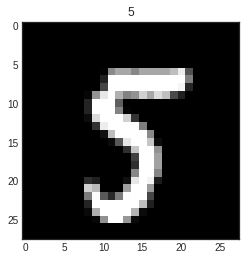

In [29]:
plt.title(label)
plt.imshow(image, cmap = 'gray')
plt.show()

### 각 Layer 설명

In [30]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

### nn.Conv2d
- in_channels: channel의 갯수
- out_channels: 출력 채널의 갯수
- kernel_size: 커널(필터) 사이즈
- 텐서플로우, 케라스와 다르게 레이어의 input인자에도 값을 집어 넣어줘야함

In [31]:
nn.Conv2d(in_channels=1, out_channels=20, kernel_size = 5, stride = 1)

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [32]:
layer = nn.Conv2d(1, 20, 5, 1).to(torch.device('cpu'))
layer

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

- weight 값 확인

In [33]:
weight = layer.weight
weight.shape

torch.Size([20, 1, 5, 5])

- `weight`는 `detach()`를 통해 꺼내줘야 `numpy()`변환이 가능

In [34]:
weight = weight.detach().numpy()
weight.shape

(20, 1, 5, 5)

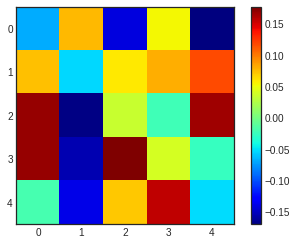

In [37]:
plt.imshow(weight[0,0,:,:], 'jet')
plt.colorbar()
plt.show()

In [38]:
print(images.shape)

torch.Size([8, 1, 28, 28])


In [39]:
input_image = torch.unsqueeze(images[0], dim = 0)
output_data = layer(input_image)

output = output_data.data
output_arr = output.numpy()
output_arr.shape

(1, 20, 24, 24)

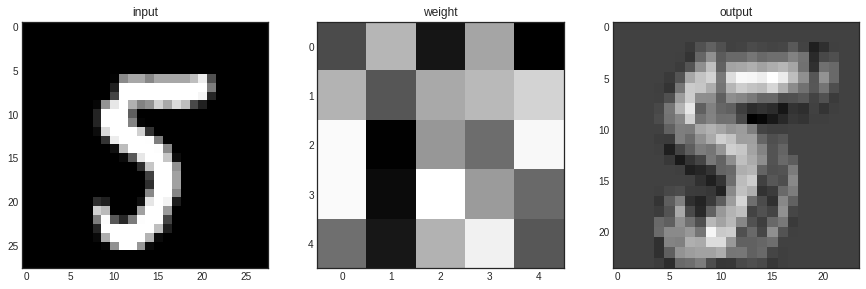

In [41]:
plt.figure(figsize = (15, 30))

plt.subplot(1,3,1)
plt.title("input")
plt.imshow(image, 'gray')

plt.subplot(1,3,2)
plt.title("weight")
plt.imshow(weight[0,0,:,:], 'gray')

plt.subplot(1,3,3)
plt.title("output")
plt.imshow(output_arr[0,0,:,:], 'gray')
plt.show()

### Pooling
- `F.max_pool2d` 
  - `stride`

  - `kernel_size`

- `torch.nn.MaxPool2d` 도 많이 사용

In [42]:
image.shape

(28, 28)

In [43]:
pool = F.max_pool2d(output, 2, 2)
pool.shape

/home/bgw2001/anaconda3/envs/py3.8/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


torch.Size([1, 20, 12, 12])

- MaxPool Layer는 weight가 없기 때문에 바로 `numpy()`변환 가능

In [44]:
pool_arr = pool.numpy()
pool_arr.shape

(1, 20, 12, 12)

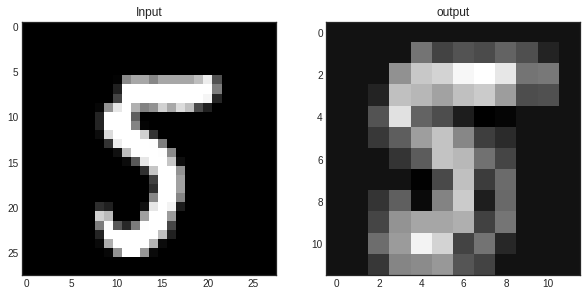

In [51]:
plt.figure(figsize = (10,15))
plt.subplot(121)
plt.title("Input")
plt.imshow(image, 'gray')

plt.subplot(122)
plt.title("output")
plt.imshow(pool_arr[0,0,:,:], 'gray')

plt.show()

### Linear
- 1d만 가능 .view()를 통해 1D로 펴쳐줘야함

In [52]:
image = torch.from_numpy(image)
image.shape

torch.Size([28, 28])

In [53]:
flatten = image.view(1, 28*28)
flatten.shape

torch.Size([1, 784])

In [54]:
lin = nn.Linear(784, 10)(flatten)
lin.shape

torch.Size([1, 10])

In [55]:
lin

tensor([[ 0.3453,  1.8904, -1.2485, -0.3254, -0.4224,  0.1445, -0.9001, -0.1537,
          0.4736, -0.0104]], grad_fn=<AddmmBackward>)

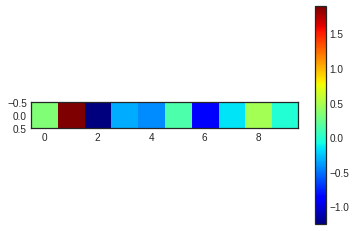

In [63]:
plt.imshow(lin.detach().numpy(), 'jet')
plt.colorbar()
plt.show()

### softmax

In [64]:
with torch.no_grad():
    flatten = image.view(1, 28 * 28)
    lin = nn.Linear(784, 10)(flatten)
    softmax = F.softmax(lin, dim = 1)

In [65]:
softmax

tensor([[0.2843, 0.0636, 0.0854, 0.0797, 0.0641, 0.0996, 0.0671, 0.0693, 0.0361,
         0.1508]])

In [67]:
import numpy as np

np.sum(softmax.numpy())

1.0

### F.relu
- Relu 함수를 적영하는 레이어
- nn.ReLU로도 사용 가능

In [73]:
inputs = torch.randn(4, 3, 28, 28).to(torch.device('cuda'))
inputs.shape

torch.Size([4, 3, 28, 28])

In [74]:
layer = nn.Conv2d(3, 20, 5, 1).to(torch.device('cuda'))
output = F.relu(layer(inputs))
output.shape

torch.Size([4, 20, 24, 24])

## Optimizer

- `import torch.optim as optim`

- `model`의 파라미터를 업데이트

- 예시)
  ```python
  optimizer = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-5)
  optimizer = optim.SGD(model.parameters(), lr=0.001)
  ```

- `.zero_grad()`로 초기화
- `.step()`으로 업데이트
